In [11]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [12]:
df = pd.read_csv('Sample.csv')

In [13]:
df.head()

,purchase_days_before_daprture,airline,baggage_weight,baggage_pieces,price
0,0,alpha,0.000000,0,8739.0
1,4,beta,0.444444,0,10088.0
2,2,beta,0.444444,0,7350.0
3,12,beta,0.888889,0,9684.0
4,17,gamma,0.444444,1,7765.0


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['airline']= le.fit_transform(df['airline'])

In [15]:
df.head()

,purchase_days_before_daprture,airline,baggage_weight,baggage_pieces,price
0,0,0,0.000000,0,8739.0
1,4,1,0.444444,0,10088.0
2,2,1,0.444444,0,7350.0
3,12,1,0.888889,0,9684.0
4,17,2,0.444444,1,7765.0


In [16]:
num_cols = ['purchase_days_before_daprture','airline','baggage_weight','baggage_pieces','price']

C:\Users\Sartaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sartaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sartaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sartaj\anaconda3\li

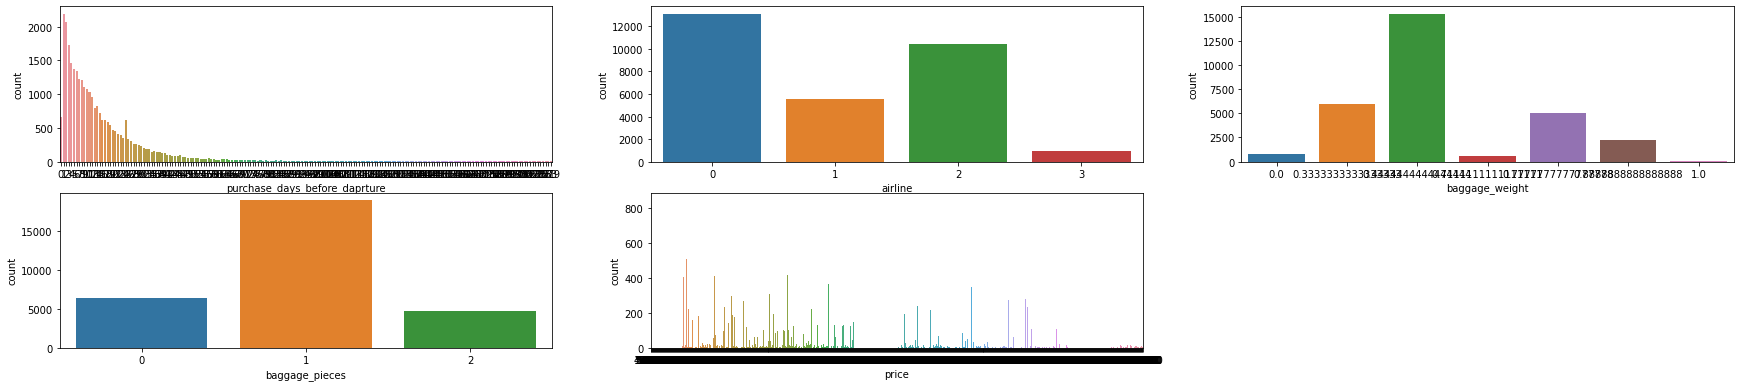

In [17]:
# Plotting cat_count plot
plt.figure(figsize=(30,20))
c =1 
for i in num_cols:
    plt.subplot(6,3,c)
    sns.countplot(df[i])
    c = c+1
plt.show()

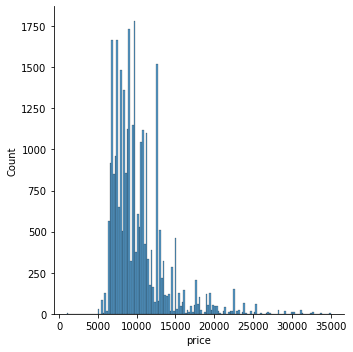

In [19]:
sns.displot(df.price)

C:\Users\Sartaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

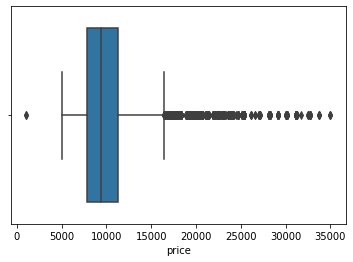

In [20]:
sns.boxplot(df.price)

In [ ]:
df.columns


Index(['purchase_days_before_daprture', 'airline', 'baggage_weight',
       'baggage_pieces', 'price'],
      dtype='object')

In [ ]:
# Spiliting 
X = df[['purchase_days_before_daprture', 'airline', 'baggage_weight','baggage_pieces']]
y = df['price']


# Machine Learning Models

In [21]:
# Now will work on ml algos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from  sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
lr = LinearRegression()
d = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [28]:
for i in [lr,d,svr,knn]:
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    test_score = r2_score(y_test,pred)
    train_score = r2_score(y_train,i.predict(X_train))
    if abs(train_score-test_score)<=0.1:
        print(i)
        print('R2 score is :', r2_score(y_test,pred))
        print('Mean Absolute error is : ', mean_absolute_error(y_test,pred))
        print('Mean Squared error : ', mean_squared_error(y_test,pred))
        print('Mean Squared error : ', mean_squared_error(y_test,pred,squared=True))
res = pd.DataFrame(pred)
res.index = X_test.index
res.columns = ['predictions']
res.to_csv("prediction_result_with_train_test_split.csv")

LinearRegression()
R2 score is : 0.08208902291737641
Mean Absolute error is :  2320.868104670255
Mean Squared error :  10925868.9593778
Mean Squared error :  10925868.9593778
DecisionTreeRegressor()
R2 score is : 0.1849228028998816
Mean Absolute error is :  2157.284036704409
Mean Squared error :  9701841.321907671
Mean Squared error :  9701841.321907671
SVR()
R2 score is : -0.017352897107627552
Mean Absolute error is :  2298.8300574875
Mean Squared error :  12109523.381634831
Mean Squared error :  12109523.381634831
KNeighborsRegressor()
R2 score is : 0.02478580005684705
Mean Absolute error is :  2387.8897
Mean Squared error :  11607947.635366669
Mean Squared error :  11607947.635366669


In [ ]:
# for mean squared error 
rms = mean_absolute_error(y_test, y_pred, squared=True)

In [32]:
df1 = pd.read_csv('DataThon/X_train.csv')
y = pd.read_csv('DataThon/y_train.csv')

In [36]:
# for horizontel stack
hor = pd.concat([df1,y],axis=1)

In [37]:
hor.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0,target
0,0,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,0.0,0,c-2,0,7400.0
1,1,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,32.0,1,c-2,1,8650.0
2,2,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,1,c-4,2,9150.0
3,3,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,2,c-4,3,10400.0
4,4,2020-12-31 09:46:18.191119+00:00,x,y,2021-01-25 11:00:00+00:00,2021-01-25 12:55:00+00:00,beta,False,20.0,0,b-69,4,8697.0


In [38]:
# VErtical 
ver =  pd.concat([df1,y],axis=0)

In [39]:
ver.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,target
0,0,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,0.0,0.0,c-2,NaN
1,1,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 05:00:00+00:00,2021-01-10 07:00:00+00:00,gamma,True,32.0,1.0,c-2,NaN
2,2,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,1.0,c-4,NaN
3,3,2020-12-31 09:46:17.463002+00:00,x,y,2021-01-10 11:00:00+00:00,2021-01-10 13:00:00+00:00,gamma,True,32.0,2.0,c-4,NaN
4,4,2020-12-31 09:46:18.191119+00:00,x,y,2021-01-25 11:00:00+00:00,2021-01-25 12:55:00+00:00,beta,False,20.0,0.0,b-69,NaN
